Investigate the classification frequency of QA and ACCA cloud products

In [1]:
import os
import rasterio as rio
import numpy as np
import shapely
import pyproj
import geopandas as gpd
import matplotlib.pyplot as plt
import rioxarray as riox
import rasterio as rio
import xarray as xr
import netCDF4
from osgeo import gdal
import pandas as pd
from datetime import datetime
import dask.array

In [2]:
# define folder and file paths
folder_HMA = os.path.join('C:',os.sep,'Users','lzell','OneDrive - Colostate','Desktop',"HMA2")
folder_glaciers = os.path.join(folder_HMA, 'Glacier Products')
folder_datasets = os.path.join(folder_HMA, 'Datasets')
fp_rgi = os.path.join(folder_HMA, 'Datasets', 'AOI definition', 'Final AOI', "Final Products", 'AOI_full_rgi.shp')

In [3]:
# open the rgi gdf, regions gdf
rgi_gdf = gpd.read_file(fp_rgi).to_crs("ESRI:102025")

In [4]:
# open the cloud data for each glacier, format into a single df
c=0
all_series = []
for idx, row in rgi_gdf.iterrows():
    c+=1
    # if c>10: continue
    
    rgi_id = row['rgi_id']
    
    # print progress
    # print(c, "of", len(rgi_gdf), rgi_id)
    if c%100==0: print(c, "of", len(rgi_gdf), rgi_id)

    # open glacier-specific cloud info as a pd.Series, append to list
    path_open = os.path.join(folder_glaciers, rgi_id, 'cloud_comparison_info.csv')
    df_g = pd.read_csv(path_open, index_col=0, header=None).squeeze()
    all_series.append(df_g)

# format into df
df_all = pd.DataFrame(all_series).reset_index(drop=True)


# format to numeric dtypes
all_cols = df_all.columns
for c in all_cols:
    if c in ['rgi_id', 'o1_region', 'o2_region']: continue
    df_all[c] = df_all[c].astype(float)
print("All done!")


100 of 769 RGI2000-v7.0-G-13-24023
200 of 769 RGI2000-v7.0-G-14-01890
300 of 769 RGI2000-v7.0-G-14-19825
400 of 769 RGI2000-v7.0-G-14-30996
500 of 769 RGI2000-v7.0-G-15-01541
600 of 769 RGI2000-v7.0-G-15-05619
700 of 769 RGI2000-v7.0-G-15-09257
All done!


In [5]:
df_all

,rgi_id,o1_region,o2_region,area_km2,dc_area_km2,obs_1988,obs_1989,obs_1990,obs_1991,obs_1992,...,acca_cloud_2014,acca_cloud_2015,acca_cloud_2016,acca_cloud_2017,acca_cloud_2018,acca_cloud_2019,acca_cloud_2020,acca_cloud_2021,acca_cloud_2022,acca_cloud_2023
0,RGI2000-v7.0-G-13-01958,13,13-01,2.0986,1.2654,12.0000,6.0000,7.0000,19.1152,15.0000,...,29.1316,38.0121,47.8257,37.7084,40.3812,41.2411,45.8549,33.1302,56.1095,52.6145
1,RGI2000-v7.0-G-13-01984,13,13-01,2.7654,1.4184,12.1681,6.0000,7.0000,19.6650,15.2056,...,36.2443,38.0793,46.5882,37.9588,42.9201,46.0831,47.0901,41.7640,64.0901,58.2544
2,RGI2000-v7.0-G-13-02028,13,13-01,6.7335,2.1546,14.0000,5.7473,8.0000,26.0000,21.0000,...,43.7657,50.9549,54.7477,50.6157,50.0363,50.8388,57.6713,48.8521,71.9662,62.1107
3,RGI2000-v7.0-G-13-02081,13,13-01,6.5496,1.1907,4.3084,3.2487,4.4467,16.8360,15.3454,...,32.0854,36.3862,36.6780,25.3810,34.1655,38.7196,43.8156,34.2555,54.6825,44.0945
4,RGI2000-v7.0-G-13-02105,13,13-01,93.2254,13.8195,13.4823,6.0000,7.5179,24.3855,19.0325,...,31.5069,33.4077,36.5894,32.1785,36.6296,36.6404,42.0086,35.8873,52.1307,40.8044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
764,RGI2000-v7.0-G-15-18045,15,15-03,29.6649,1.8054,25.8350,35.0000,32.0000,37.0000,43.0000,...,45.7388,47.3480,47.1645,37.8096,52.6635,43.5887,46.0369,52.0708,52.0184,59.1825
765,RGI2000-v7.0-G-15-18077,15,15-03,9.5182,1.1124,26.6327,34.0000,32.0000,37.0000,43.0000,...,59.5663,62.1521,63.1626,54.2953,75.2969,61.2371,60.4515,64.5769,74.5728,93.0769
766,RGI2000-v7.0-G-15-18121,15,15-03,24.5352,2.0241,31.7377,39.1138,35.1925,34.9715,45.5362,...,59.9951,55.0316,60.5838,53.0756,65.4068,56.2508,62.0093,61.5153,73.2041,87.0867
767,RGI2000-v7.0-G-15-18122,15,15-03,7.8047,1.3428,17.7245,30.0597,26.6012,25.7721,36.7842,...,30.5355,28.5657,26.9444,24.5999,25.1702,25.0717,32.4276,32.6153,35.1568,38.2869


In [6]:
# lets add column that calculates total obs across all years
year_range = range(1988,1999)
cols_obs = [ f"obs_{y}" for y in year_range ]
cols_qa = [ f"qa_cloud_{y}" for y in year_range ]
cols_acca = [ f"acca_cloud_{y}" for y in year_range ]

df_all['obs_sum'] = df_all[cols_obs].sum(axis=1)
df_all['qa_sum'] = df_all[cols_qa].sum(axis=1)
df_all['acca_sum'] = df_all[cols_acca].sum(axis=1)

Text(0, 0.5, 'QA cloud observations')

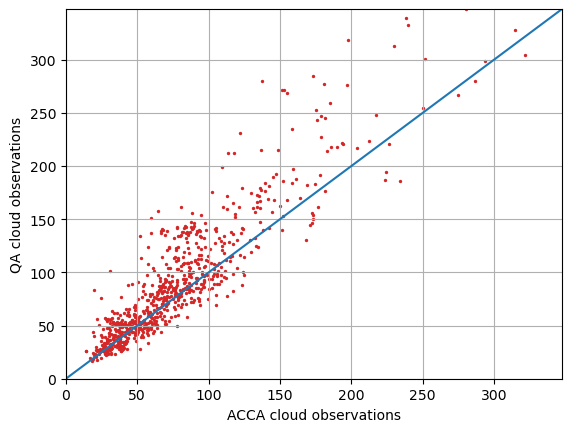

In [7]:
fig, axs = plt.subplots()
n_max = max(np.nanmax(df_all['acca_sum']),np.nanmax(df_all['qa_sum']) )
axs.plot([0,n_max], [0,n_max])
axs.scatter(df_all['acca_sum'], df_all['qa_sum'],
               s=2, c='tab:red')

axs.set_xlim(0,n_max)
axs.set_ylim(0,n_max)
axs.grid(zorder=1)

axs.set_xlabel("ACCA cloud observations")
axs.set_ylabel("QA cloud observations")


Text(0.5, 0, 'Glacier-specific cloud cover frequency')

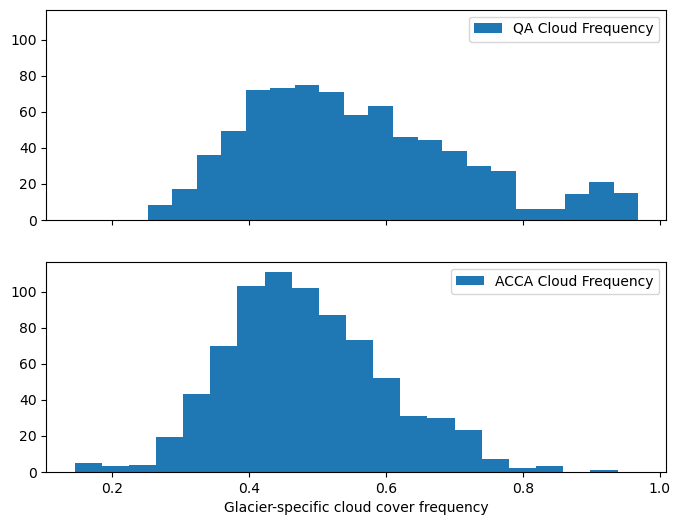

In [8]:
# histogram
fig, axs = plt.subplots(2,1, figsize=(8,6), sharex=True, sharey=True)

hist_data = df_all['qa_sum']/df_all['obs_sum']
axs[0].hist(hist_data, bins=20, label='QA Cloud Frequency')
axs[0].legend()

hist_data = df_all['acca_sum']/df_all['obs_sum']
axs[1].hist(hist_data, bins=20, label='ACCA Cloud Frequency')
axs[1].legend()

axs[1].set_xlabel('Glacier-specific cloud cover frequency')